## Лаб.07

### Применение предобученных ИНС для классификации изображений. Часть2

---

#### Задание:
Познакомиться с методами использования предобученных сверточных ИНС различных архитектур в задаче распознавания изображений. Получить навыки обработки набора изображений, сохраненном в формате `.npy`

Оценить качество решений, полученных с помощью различных архитектур.

В задании используется неразмеченный набор, включающий 1000 цветных изображений. Для классификации этих изображений можно использовать 1000-классовые модели, полученные путем применения ИНС известных архитектур, обученных на наборе `ImageNet`

<u>Справочная информация о файлах</u> `.npy`

Формат файлов `.npy` — собственный формат `NumPy` для хранения массивов без сжатия (для хранения массивов со сжатием имеется формат `.npz`). Такой файл может быть создан с помощью метода `numpy.save()`. Для загрузки массива из файла `.npy` нужно использовать метод `numpy.load()`. Более подробно (и очень доступно) [здесь](https://pyprog.pro/file_input_and_output.html#file_input_and_output_ch1) (на русском языке) и [здесь](https://towardsdatascience.com/what-is-npy-files-and-why-you-should-use-them-603373c78883) (на английском). [Документация](https://numpy.org/devdocs/reference/generated/numpy.lib.format.html)


**Порядок выполнения работы:**
1. Используя [ссылку](https://disk.yandex.ru/d/IiZkvhnQ98R_Kw), скачайте с Яндекс-диска набор изображений, сохраненных в виде файла `.npy`. Сохраните файл на диске в своем аккаунте Google. Подключите Google-диск для работы в Colab. Убедитесь, что файл с изображениями доступен.
2. Создайте тестовый набор изображений X_test, загрузив их из файла `.npy` с помощью метода `numpy.load()`. Описание метода [в документации](https://numpy.org/doc/stable/reference/generated/numpy.load.html?highlight=numpy%20load#numpy-load). Из параметров достаточно указать только имя файла на диске.
3. Выведите размерность полученного массива.
4. Выведите 10-15 изображений набора данных.
5. Импортируйте значения меток классов из файла `classes.csv` (в команде на вкладке Файлы). Этот файл тоже можно предварительно сохранить на Google-диске, но в данном случае это не принципиально из-за его небольшого объема.
6. Выполните предварительную обработку данных (с учетом того, что впоследствии к ним будет применяться метод `preprocess_input()`):<br>`X_test_1 = X_test * 255`<br>`X_test_1 = X_test_1.astype('float32')`
7. К полученному массиву примените метод `preprocess_input()` для подготовки данных к подаче на вход модели VGG16.
8. Создайте модель VGG16, обученную на наборе изображений ImageNet с количеством классов по умолчанию (т. е. 1000).
9. Получите предсказания модели на наборе предварительно подготовленных изображений. Выведите метки классов с наибольшей вероятностью.
10. Выведите изображения исходного набора X_test (до применения предварительной обработки) с номерами 100 – 114 вместе с названиями классов, которые модель считает наиболее вероятными. Проанализируйте результаты распознавания.
11. Повторите пп. 6 – 10, используя модели ResNet50, InceptionV3, Xception и DenseNet201.
12. Проанализируйте результаты распознавания выбранных изображений ИНС с разными архитектурами.

---

1. Используя [ссылку](https://disk.yandex.ru/d/IiZkvhnQ98R_Kw), скачайте с Яндекс-диска набор изображений, сохраненных в виде файла `.npy`. Сохраните файл на диске в своем аккаунте Google. Подключите Google-диск для работы в Colab. Убедитесь, что файл с изображениями доступен.

In [ ]:
# подключим библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input as __preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input as __preprocess_input
from tensorflow.keras.applications.densenet import DenseNet201
import cv2 as preprocess_input_model
from sklearn.metrics import accuracy_score

In [ ]:
def _preprocess_input(data):
    return np.array([preprocess_input_model.resize(img, (299, 299)) for img in X_test])

--- 

2. Создайте тестовый набор изображений X_test, загрузив их из файла `.npy` с помощью метода `numpy.load()`. Описание метода [в документации](https://numpy.org/doc/stable/reference/generated/numpy.load.html?highlight=numpy%20load#numpy-load). Из параметров достаточно указать только имя файла на диске.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# create a test set of X_test images by loading them from a .npy file using the numpy.load() method

# use this line if on Jupyter
# X_test = np.load('test.npy')

# use this line if on Colab
X_test = np.load('gdrive/My Drive/Colab Notebooks/data/test.npy')

---

3. Выведите размерность полученного массива.

In [ ]:
# print the dimension of the resulting array

print(X_test.shape)

(1000, 224, 224, 3)


---

4. Выведите 10-15 изображений набора данных.

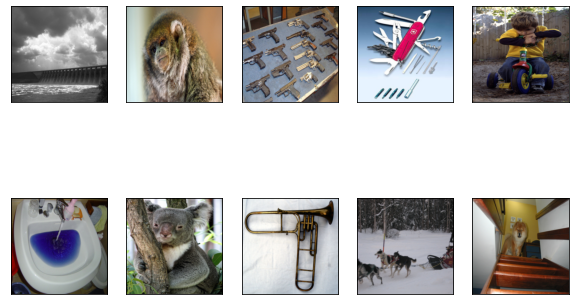

In [ ]:
# display 10-15 images of the dataset

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

---

5. Импортируйте значения меток классов из файла `classes.csv` (в команде на вкладке Файлы). Этот файл тоже можно предварительно сохранить на Google-диске, но в данном случае это не принципиально из-за его небольшого объема.

In [ ]:
# import the class label values from the classes.csv file

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/classes.csv')

print(df.head())

   Unnamed: 0  ind              class
0           0    0              tench
1           1    1           goldfish
2           2    2  great_white_shark
3           3    3        tiger_shark
4           4    4         hammerhead


---

6. Выполните предварительную обработку данных (с учетом того, что впоследствии к ним будет применяться метод `preprocess_input()`):<br>`X_test_1 = X_test * 255`<br>`X_test_1 = X_test_1.astype('float32')`

In [ ]:
# preprocess the data

X_test_1 = X_test * 255
X_test_1 = X_test_1.astype('float32')

---

7. К полученному массиву примените метод `preprocess_input()` для подготовки данных к подаче на вход модели VGG16.

In [ ]:
# apply the preprocess_input() method to the resulting array to prepare data for input to the VGG16 model

X_test_1 = preprocess_input(X_test_1)

---

8. Создайте модель VGG16, обученную на наборе изображений ImageNet с количеством классов по умолчанию (т. е. 1000).

In [ ]:
# create a VGG16 model trained on the ImageNet image set with the default number of classes (i.e. 1000)

model = VGG16()

---

9. Получите предсказания модели на наборе предварительно подготовленных изображений. Выведите метки классов с наибольшей вероятностью.

In [ ]:
# obtain model predictions on a set of pre-trained images. Output class labels with the highest probability

y_pred = model.predict(X_test_1)
y_pred = np.argmax(y_pred, axis=1)

32/32 [==============================] - 11s 172ms/step


---

10. Выведите изображения исходного набора X_test (до применения предварительной обработки) с номерами 100 – 114 вместе с названиями классов, которые модель считает наиболее вероятными. Проанализируйте результаты распознавания.

32/32 [==============================] - 5s 145ms/step


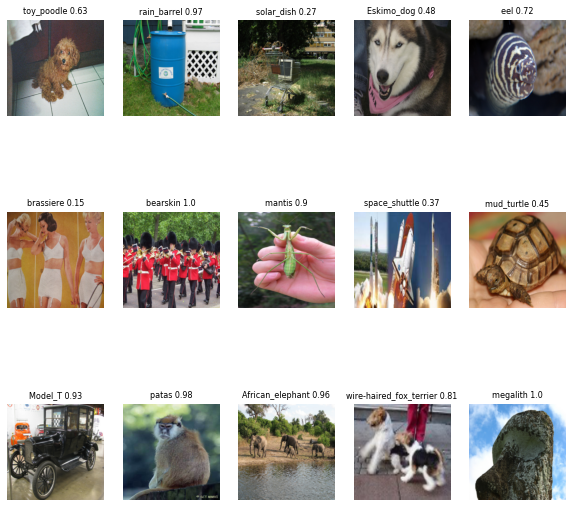

In [ ]:
# output images of the original X_test set (before applying preprocessing) with numbers 100 - 114 along with their names

y_pred_prob = model.predict(X_test_1)
y_pred_prob = np.max(y_pred_prob, axis=1)

plt.figure(figsize=(10, 10))
for i in range(100, 115):
    plt.subplot(3, 5, i - 99)
    plt.imshow(X_test[i])
    plt.title(df['class'][y_pred[i]] + ' ' + str(round(y_pred_prob[i], 2)), fontsize=8)
    plt.axis('off')
plt.show()

# numbers next to the names of each image correspond to the probability that name belongs to that image

---

11. Повторите пп. 6 – 10, используя модели ResNet50, InceptionV3, Xception и DenseNet201.

32/32 [==============================] - 3s 85ms/step


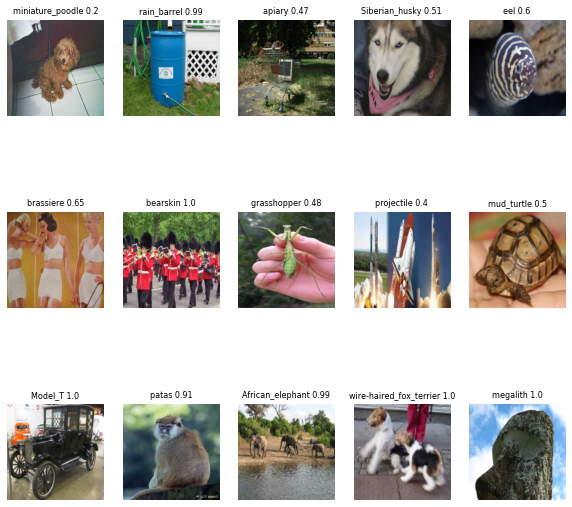

In [ ]:
# repeat steps. 6 - 10 using the ResNet50, InceptionV3, Xception and DenseNet201 models


model = ResNet50()

y_pred = model.predict(X_test_1)

y_pred = np.argmax(y_pred, axis=1)

y_pred_prob = model.predict(X_test_1)
y_pred_prob = np.max(y_pred_prob, axis=1)

plt.figure(figsize=(10, 10))
for i in range(100, 115):
    plt.subplot(3, 5, i - 99)
    plt.imshow(X_test[i])
    plt.title(df['class'][y_pred[i]] + ' ' + str(round(y_pred_prob[i], 2)), fontsize=8)
    plt.axis('off')
plt.show()

32/32 [==============================] - 3s 107ms/step


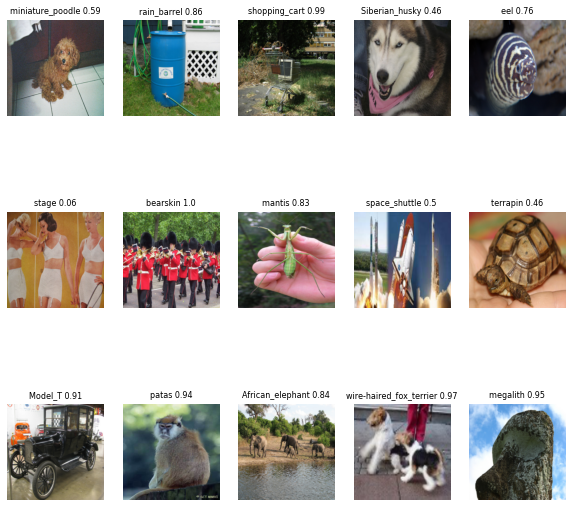

In [ ]:
model = InceptionV3()

X_test_inception = _preprocess_input(X_test)

y_pred = model.predict(X_test_inception)

y_pred = np.argmax(y_pred, axis=1)

y_pred_prob = model.predict(X_test_inception)
y_pred_prob = np.max(y_pred_prob, axis=1)

plt.figure(figsize=(10, 10))
for i in range(100, 115):
    plt.subplot(3, 5, i - 99)
    plt.imshow(X_test[i])
    plt.title(df['class'][y_pred[i]] + ' ' + str(round(y_pred_prob[i], 2)), fontsize=8)
    plt.axis('off')
plt.show()

32/32 [==============================] - 7s 238ms/step


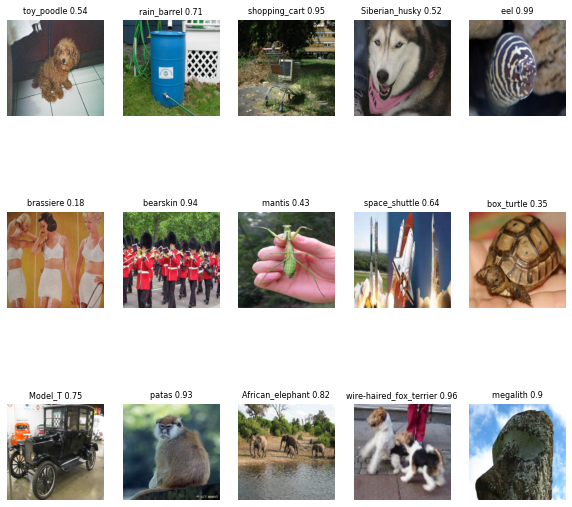

In [ ]:
model = Xception()

X_test_xception = _preprocess_input(X_test)

y_pred = model.predict(X_test_xception)

y_pred = np.argmax(y_pred, axis=1)

y_pred_prob = model.predict(X_test_xception)
y_pred_prob = np.max(y_pred_prob, axis=1)

plt.figure(figsize=(10, 10))
for i in range(100, 115):
    plt.subplot(3, 5, i - 99)
    plt.imshow(X_test[i])
    plt.title(df['class'][y_pred[i]] + ' ' + str(round(y_pred_prob[i], 2)), fontsize=8)
    plt.axis('off')
plt.show()

32/32 [==============================] - 4s 134ms/step


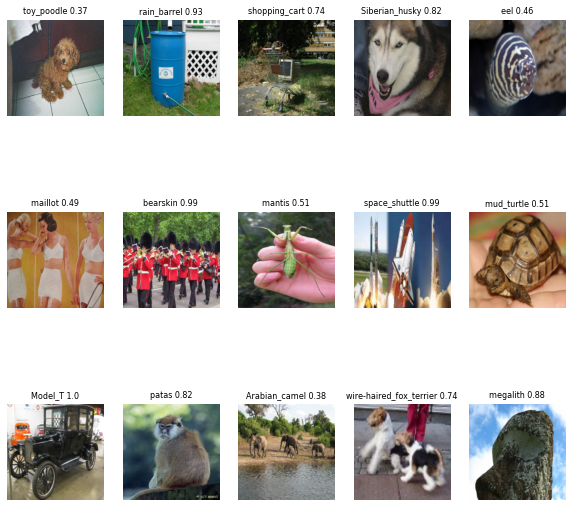

In [ ]:
from tensorflow.keras.applications.densenet import preprocess_input

model = DenseNet201()
X_test_1 = preprocess_input(X_test_1)

y_pred = model.predict(X_test_1)

y_pred = np.argmax(y_pred, axis=1)

y_pred_prob = model.predict(X_test_1)
y_pred_prob = np.max(y_pred_prob, axis=1)

plt.figure(figsize=(10, 10))
for i in range(100, 115):
    plt.subplot(3, 5, i - 99)
    plt.imshow(X_test[i])
    plt.title(df['class'][y_pred[i]] + ' ' + str(round(y_pred_prob[i], 2)), fontsize=8)
    plt.axis('off')
plt.show()